In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# Load the dataset in pokeman variable
pokeman = pd.read_csv("dataset\\pokemon.csv")

In [39]:
pokeman.head() # Show the first 5 elements

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [40]:
pokeman.Legendary.unique().sum() 

1

In [41]:
pokeman.isnull().sum() # Check the null values in the datasets

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [42]:
pokeman[pokeman["Name"].isnull()] # Show the null value

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [71]:
pokeman[pokeman["Type 2"].isnull()] # check the null values in Type 2 category pokeman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation


In [44]:
attack_defance = pokeman[["Attack","Defense"]] # get the Attack and defense columns of pokeman datasets

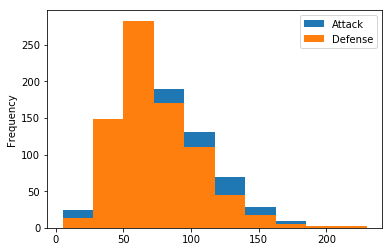

In [45]:
# showthe histogram of attack and defense columns
attack_defance.plot(kind="hist")
plt.show()

In [46]:
pokeman["Type 1"].unique() # Check thw unique character of column Type 1

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [47]:
pokeman["Type 2"].unique() # Check thw unique character of column Type 2

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [48]:
pokeman.drop(pokeman["Name"].isnull(),inplace=True) # Drop those rows from columns who name is NaN

In [49]:
pokeman.fillna(method="ffill",inplace=True) # Fill the NaN value 

In [50]:
pokeman.isnull().sum() # Check the another type null values in pokeman datasets

#             0
Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [51]:
pokeman.Legendary.unique()

array([False,  True], dtype=bool)

In [52]:
pokeman.shape # check the shape datasets 

(798, 12)

In [53]:
y = pokeman.Legendary # get label values from datasets and store in y variable

In [54]:
pokeman.drop(["Legendary"],inplace = True,axis=1) # Drop Legendary column from dataset

In [55]:
pokeman.head() # check first five rows

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1
4,5,Charmander,Fire,Poison,39,52,43,60,50,65,1
5,6,Charmeleon,Fire,Poison,58,64,58,80,65,80,1
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1


In [56]:
ty = np.where(y == True,1,0) # convert to numerical value

In [57]:
# Funcation for converting String and object to numerical values
def label_encoder(data):
    encoder = LabelEncoder()
    return encoder.fit_transform(data)

In [58]:
pokeman["Type 1"] = label_encoder(pokeman["Type 1"])

In [59]:
pokeman["Type 2"] = label_encoder(pokeman["Type 2"])

In [60]:
pokeman.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
2,3,Venusaur,9,13,80,82,83,100,100,80,1
3,4,Mega Venusaur,9,13,80,100,123,122,120,80,1
4,5,Charmander,6,13,39,52,43,60,50,65,1
5,6,Charmeleon,6,13,58,64,58,80,65,80,1
6,7,Charizard,6,7,78,84,78,109,85,100,1


In [61]:
 # get columns for training the model
train_data = pokeman[["Type 1","Type 2","HP","Attack","Defense","Sp. Atk","Sp. Def" ,"Speed","Generation"]]

In [62]:
train_data.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
2,9,13,80,82,83,100,100,80,1
3,9,13,80,100,123,122,120,80,1
4,6,13,39,52,43,60,50,65,1
5,6,13,58,64,58,80,65,80,1
6,6,7,78,84,78,109,85,100,1


In [63]:
train_data.shape,y.shape

((798, 9), (798,))

In [64]:
# Split data for training and testing purpose
train_x , test_x , train_y , test_y = train_test_split(train_data , y , test_size = 0.15 , random_state = 33)

In [65]:

# model on simple regression base
regression = LogisticRegression(C=7 , dual=False , max_iter=70 , random_state=33)
regression.fit(train_x,train_y)
y_pred = regression.predict(test_x)
accuracy_score(y_pred=y_pred,y_true=test_y)

0.95833333333333337

In [66]:
# model base on svc
svc = SVC(C=1 , gamma=0.001 , kernel="linear" , probability=False , random_state=33 , shrinking=False , tol=0.0001)
svc.fit(train_x,train_y)
y_pred = svc.predict(test_x)
accuracy_score(y_pred=y_pred,y_true=test_y)

0.93333333333333335

In [67]:
forest = RandomForestClassifier(max_depth=5 , max_features=5 , n_jobs=15 , random_state=33)
forest.fit(train_x,train_y)
y_pred = forest.predict(test_x)
accuracy_score(y_pred=y_pred,y_true=test_y)

0.94166666666666665

In [68]:
neighbours= KNeighborsClassifier()
neighbours.fit(train_x,train_y)
y_pred = neighbours.predict(test_x)
accuracy_score(y_pred=y_pred,y_true=test_y)

0.92500000000000004

In [69]:
type_pokeman = pokeman[["Type 1","Type 2"]][:10]

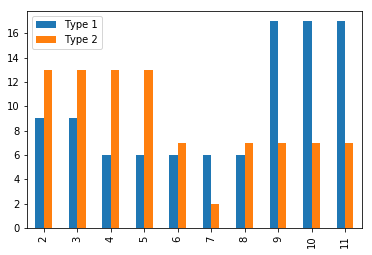

In [70]:
type_pokeman.plot(kind="bar")
plt.show()